# Load Dependencies

In [2]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Read Dataset

In [3]:
df = pd.read_csv(r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\heart-disease\raw_merged_heart_dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
2177,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


# Glimpse of Dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
2176,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
2177,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0
2180,53,1,0,110,335,0,1,143,1,3.0,1,1,3,0


## Data Shape

In [6]:
print(df.shape)

(2181, 14)


# Data Cleaning

## Data Types

In [7]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalachh     object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object


## Convert Non-Numerical Data Type to Numerical

In [8]:
# Convert non-numeric columns to numeric
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            # Handle cases where conversion is not possible
            print(f"Could not convert column '{col}' to numeric.")

## Display DataFrame

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,60,1,0,140.0,207.0,0.0,0.0,138.0,1.0,1.9,2.0,1.0,3.0,0
2177,46,1,0,140.0,311.0,0.0,1.0,120.0,1.0,1.8,1.0,2.0,3.0,0
2178,59,1,3,134.0,204.0,0.0,1.0,162.0,0.0,0.8,2.0,2.0,2.0,0
2179,54,1,1,154.0,232.0,0.0,0.0,164.0,0.0,0.0,2.0,1.0,2.0,0


## Display Final Converted Data Type

In [10]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalachh    float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


## Unique Values

In [11]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'age': [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77 28 30 31 32 33 36]
Unique values in column 'sex': [1 0]
Unique values in column 'cp': [3 2 1 0 4]
Unique values in column 'trestbps': [145. 130. 120. 140. 172. 150. 110. 135. 160. 105. 125. 142. 155. 104.
 138. 128. 108. 134. 122. 115. 118. 100. 124.  94. 112. 102. 152. 101.
 132. 148. 178. 129. 180. 136. 126. 106. 156. 170. 146. 117. 200. 165.
 174. 192. 144. 123. 154. 114. 164.  98. 190.  nan 113.  92. 158.]
Unique values in column 'chol': [233. 250. 204. 236. 354. 192. 294. 263. 199. 168. 239. 275. 266. 211.
 283. 219. 340. 226. 247. 234. 243. 302. 212. 175. 417. 197. 198. 177.
 273. 213. 304. 232. 269. 360. 308. 245. 208. 264. 321. 325. 235. 257.
 216. 256. 231. 141. 252. 201. 222. 260. 182. 303. 265. 309. 186. 203.
 183. 220. 209. 258. 227. 261. 221. 205. 240. 318. 298. 564. 277. 214.
 248. 255. 207. 223. 288. 160. 394. 315. 24

## Checking for Missing Values

In [12]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2177,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2178,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2179,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
      trestbps   chol  fbs  restecg  thalachh  exang  slope  ca  thal
1328     130.0  132.0  0.0      2.0     185.0    0.0    NaN NaN   NaN
1329     120.0  243.0  0.0      0.0     160.0    0.0    NaN NaN   NaN
1330     140.0    NaN  0.0      0.0     170.0    0.0    NaN NaN   NaN
1331     170.0  237.0  0.0      1.0     170.0    0.0    NaN NaN   6.0
1332     100.0  219.0  0.0      1.0     150.0    0.0    NaN NaN   NaN
...        ...    ...  ...      ...       ...    ...    ...  ..   ...
1617     160.0  331.0  0.0      0.0      94.0    1.0    NaN NaN   NaN
1618     130.0  294.0  0.0      1.0     100.0    1.0    2.0 NaN   NaN
1619     155.0  342.0  1.0      0.0     150.0    1.0    2.0 NaN   NaN
1620     180.0  393.0  0.0      0.0     110.0    1.0    2.0 NaN   7.0
1621     130.0  275.0  0.0      1.0     115.0    1.0    2.0 NaN   NaN

[293 rows x 9 columns]


### Handling Mising Values - Drop Null Rows

In [14]:
df.dropna(inplace=True)

# Display the DataFrame after dropping null rows
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,60,1,0,140.0,207.0,0.0,0.0,138.0,1.0,1.9,2.0,1.0,3.0,0
2177,46,1,0,140.0,311.0,0.0,1.0,120.0,1.0,1.8,1.0,2.0,3.0,0
2178,59,1,3,134.0,204.0,0.0,1.0,162.0,0.0,0.8,2.0,2.0,2.0,0
2179,54,1,1,154.0,232.0,0.0,0.0,164.0,0.0,0.0,2.0,1.0,2.0,0


In [15]:
# Reset the index to a proper list in ascending order
df = df.reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140.0,207.0,0.0,0.0,138.0,1.0,1.9,2.0,1.0,3.0,0
1884,46,1,0,140.0,311.0,0.0,1.0,120.0,1.0,1.8,1.0,2.0,3.0,0
1885,59,1,3,134.0,204.0,0.0,1.0,162.0,0.0,0.8,2.0,2.0,2.0,0
1886,54,1,1,154.0,232.0,0.0,0.0,164.0,0.0,0.0,2.0,1.0,2.0,0


## Checking for Duplicated Values

In [16]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1286

Duplicate Rows:
      age  sex  cp  trestbps   chol  fbs  restecg  thalachh  exang  oldpeak  \
164    38    1   2     138.0  175.0  0.0      1.0     173.0    0.0      0.0   
303    52    1   0     125.0  212.0  0.0      1.0     168.0    0.0      1.0   
304    53    1   0     140.0  203.0  1.0      0.0     155.0    1.0      3.1   
305    70    1   0     145.0  174.0  0.0      1.0     125.0    1.0      2.6   
306    61    1   0     148.0  203.0  0.0      1.0     161.0    0.0      0.0   
...   ...  ...  ..       ...    ...  ...      ...       ...    ...      ...   
1879   42    1   0     136.0  315.0  0.0      1.0     125.0    1.0      1.8   
1881   59    1   2     126.0  218.0  1.0      1.0     134.0    0.0      2.2   
1882   40    1   0     152.0  223.0  0.0      1.0     181.0    0.0      0.0   
1884   46    1   0     140.0  311.0  0.0      1.0     120.0    1.0      1.8   
1885   59    1   3     134.0  204.0  0.0      1.0     162.0    0.0      0.8   

   

# Descriptive Statistical Analysis


## Describe Data

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


## Measuring Central Tendency


In [18]:
# Select column
columns_to_analyze = df.columns[0:13]

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
age          54.354343
sex           0.688559
cp            1.279131
trestbps    131.549258
chol        246.855403
fbs           0.148305
restecg       0.597458
thalachh    149.424258
exang         0.331568
oldpeak       1.053761
slope         1.421610
ca            0.731462
thal          2.662606
dtype: float64

Median values for features:
age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalachh    152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
dtype: float64

Mode values for features:
age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        234.0
fbs           0.0
restecg       0.0
thalachh    162.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
Name: 0, dtype: float64


## Measures of Variability


In [19]:
# Select column
columns_to_analyze = df.columns[0:13]

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[columns_to_analyze].std()
variance_values = df[columns_to_analyze].var()
range_values = df[columns_to_analyze].max() - df[columns_to_analyze].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
age          9.081505
sex          0.463205
cp           1.280877
trestbps    17.556985
chol        51.609329
fbs          0.355496
restecg      0.638820
thalachh    23.006153
exang        0.470901
oldpeak      1.161344
slope        0.619588
ca           1.015735
thal         1.249924
dtype: float64

Variance values for numerical features:
age           82.473738
sex            0.214559
cp             1.640645
trestbps     308.247705
chol        2663.522801
fbs            0.126378
restecg        0.408091
thalachh     529.283078
exang          0.221748
oldpeak        1.348719
slope          0.383889
ca             1.031718
thal           1.562311
dtype: float64

Range values for numerical features:
age          48.0
sex           1.0
cp            4.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalachh    131.0
exang         1.0
oldpeak       6.2
slope         3.0
ca            4.0
thal          7.0
dtype: fl

#Distribution of Features

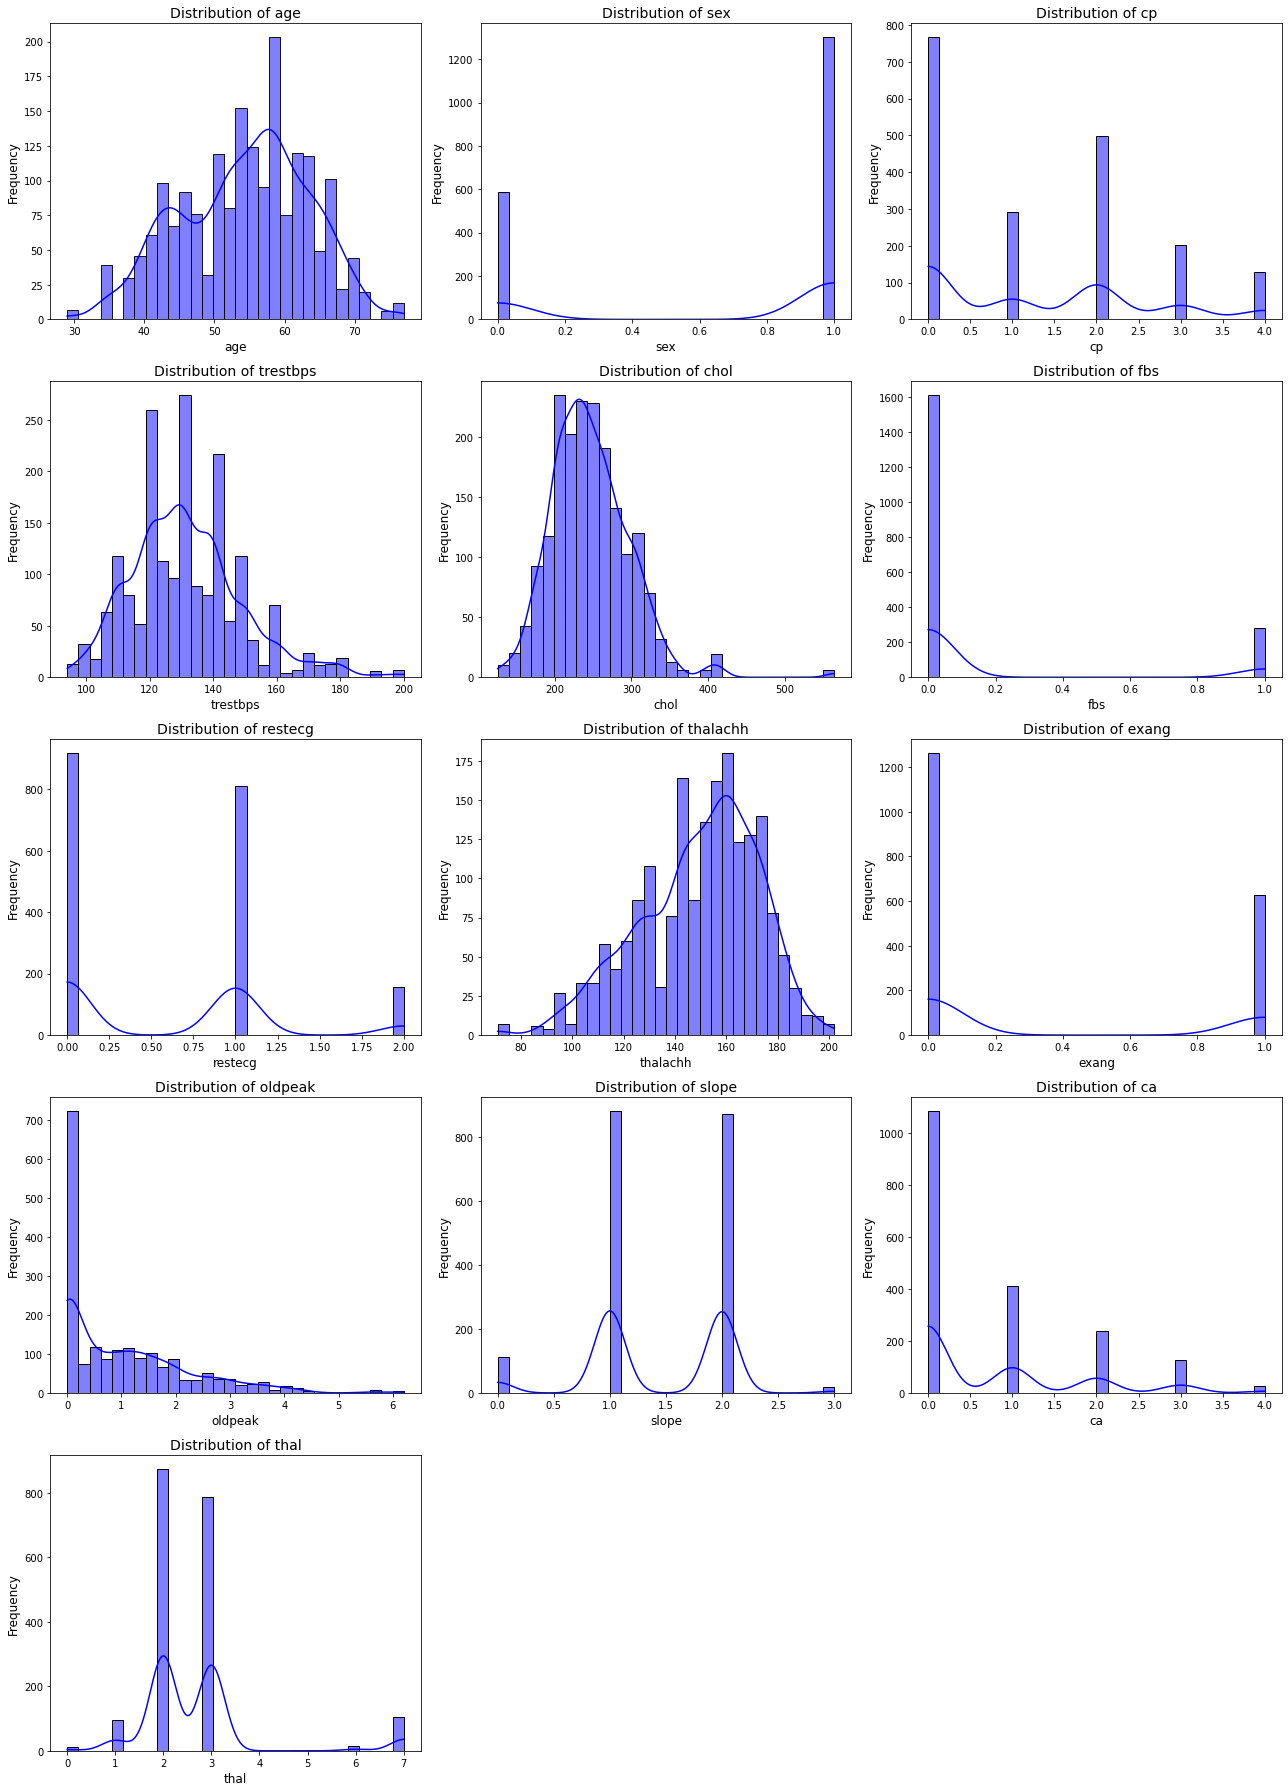

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[13]])

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Checking for Outliers


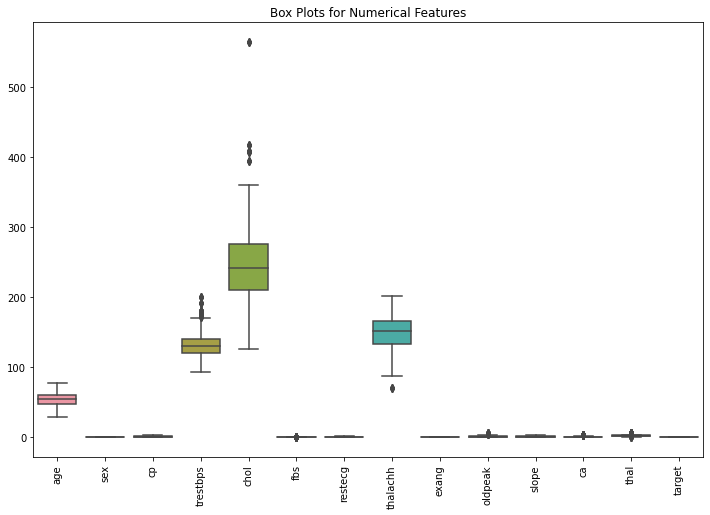

In [21]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Handling Outliers using IQR Method

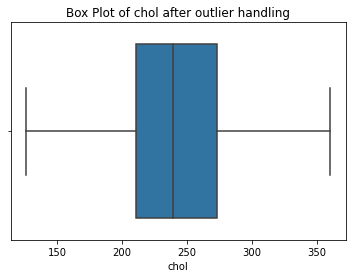

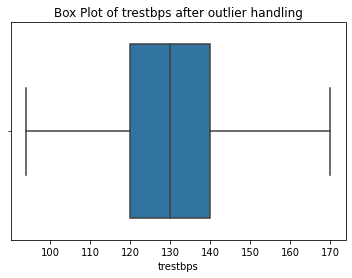

In [22]:
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to the 'chol' column
df = handle_outliers_iqr(df, column='chol')

# Apply the function to the 'trestbps' column
df = handle_outliers_iqr(df, column='trestbps')

# Reset the index after removing outliers
df = df.reset_index(drop=True)

# Verify the changes for 'chol' (optional)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['chol'])
plt.title('Box Plot of chol after outlier handling')
plt.show()

# Verify the changes for 'trestbps' (optional)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['trestbps'])
plt.title('Box Plot of trestbps after outlier handling')
plt.show()


## Display Cleaned Data after Removing Outliers

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,60,1,0,140.0,207.0,0.0,0.0,138.0,1.0,1.9,2.0,1.0,3.0,0
1796,46,1,0,140.0,311.0,0.0,1.0,120.0,1.0,1.8,1.0,2.0,3.0,0
1797,59,1,3,134.0,204.0,0.0,1.0,162.0,0.0,0.8,2.0,2.0,2.0,0
1798,54,1,1,154.0,232.0,0.0,0.0,164.0,0.0,0.0,2.0,1.0,2.0,0


## Distribution of Cleaned Features

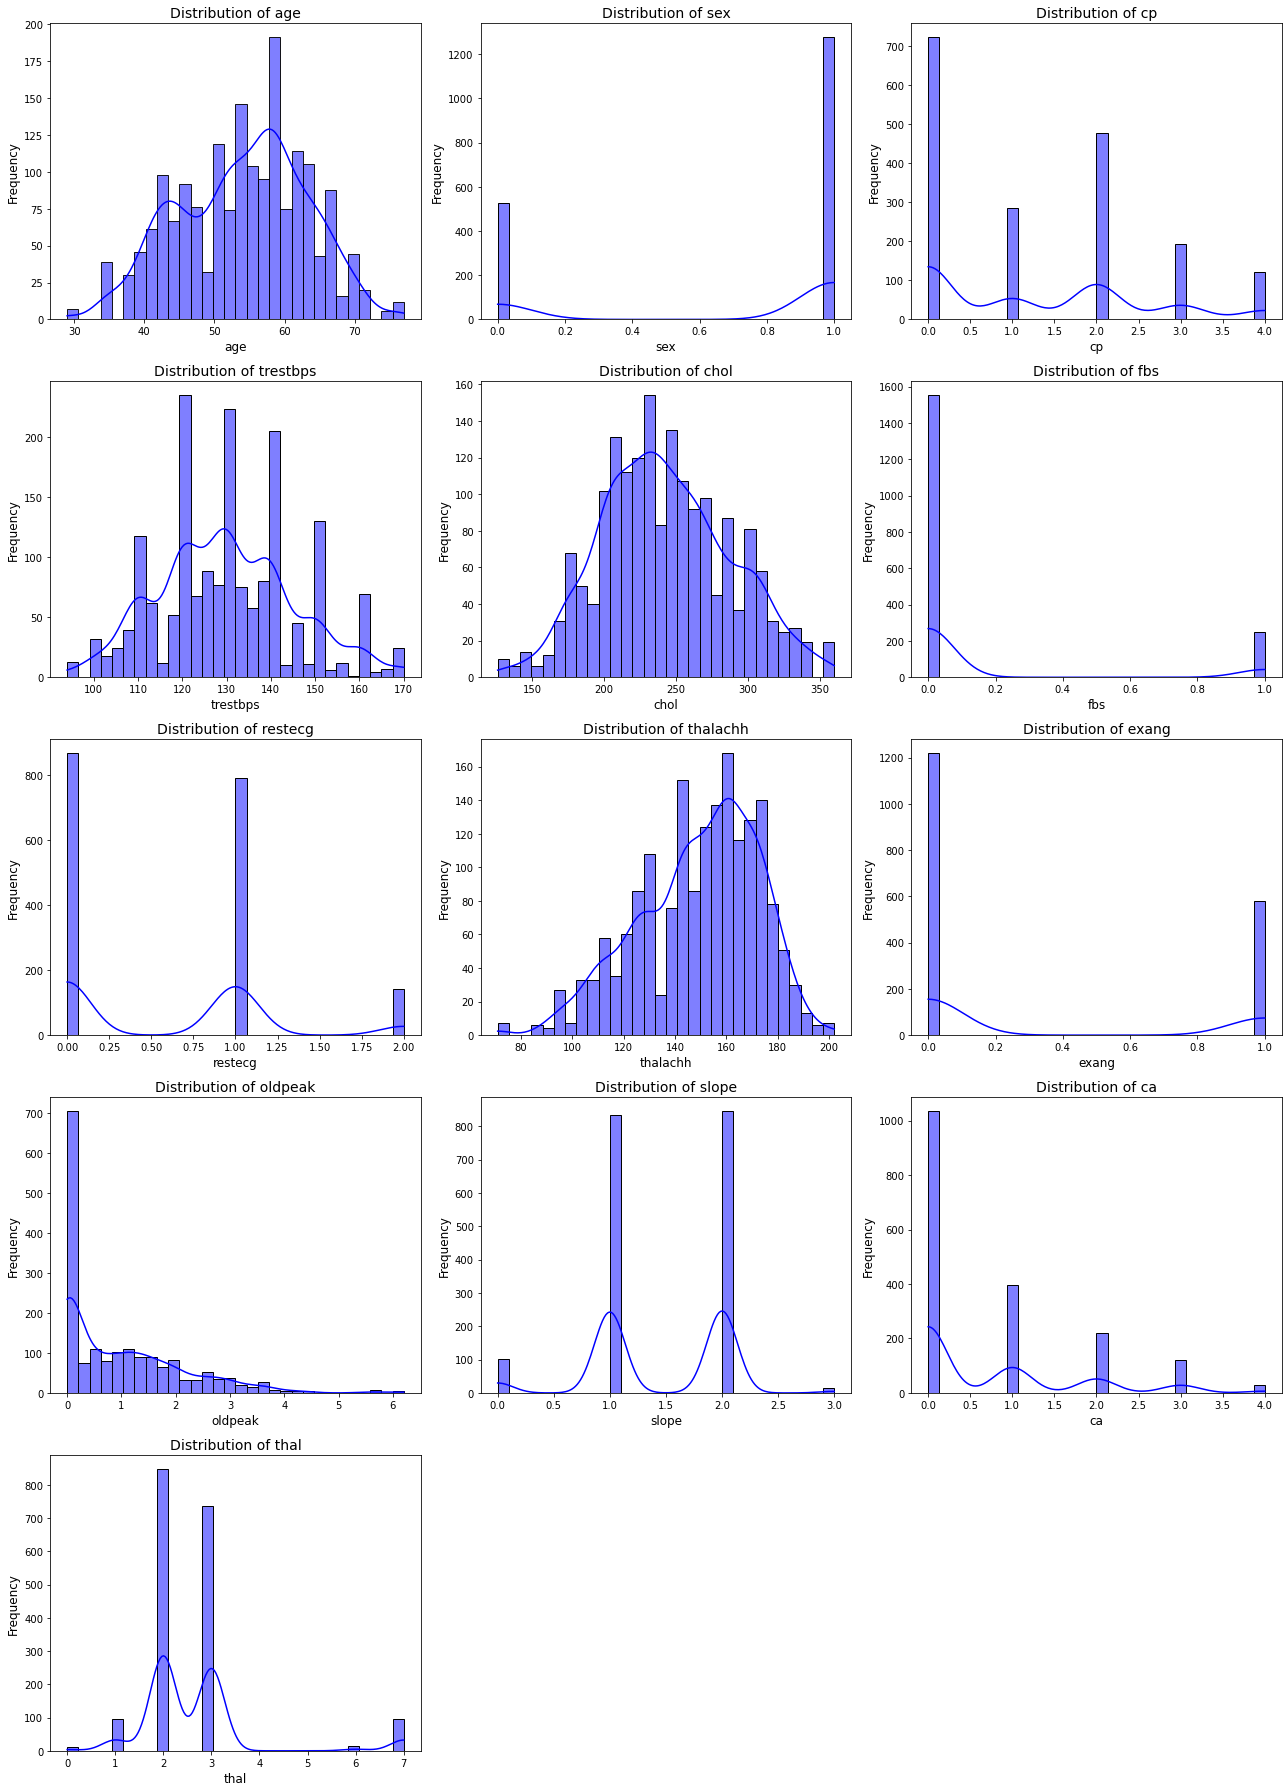

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[13]])

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Cleaned Data Visualziation after Handling Outliers

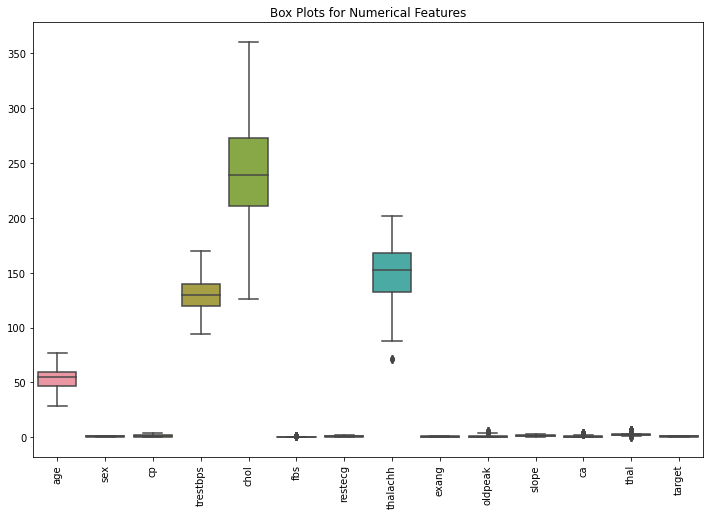

In [25]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

# Correlation

## Correlation Matrix


In [26]:
correlation_matrix = df.corr("pearson")
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.073959,-0.039024,0.264462,0.180729,0.101799,-0.057568,-0.412595,0.083581,0.202585,-0.117610,0.292747,0.044806,-0.166758
sex,-0.073959,1.000000,-0.055436,-0.009198,-0.113577,0.054375,-0.027401,-0.064342,0.192039,0.134721,-0.039709,0.130758,0.184855,-0.220520
cp,-0.039024,-0.055436,1.000000,0.045617,-0.044530,0.048047,0.209136,0.174657,-0.228285,-0.099402,0.156934,-0.102734,0.386866,0.295671
trestbps,0.264462,-0.009198,0.045617,1.000000,0.108435,0.110254,-0.083597,-0.057021,0.001962,0.159517,-0.059582,0.109665,0.022297,-0.074787
chol,0.180729,-0.113577,-0.044530,0.108435,1.000000,0.029154,-0.054004,-0.038180,0.090064,-0.009300,0.015641,0.078433,0.047688,-0.088950
fbs,0.101799,0.054375,0.048047,0.110254,0.029154,1.000000,-0.054200,-0.006504,0.013622,-0.013132,-0.041397,0.128393,-0.025847,-0.027019
restecg,-0.057568,-0.027401,0.209136,-0.083597,-0.054004,-0.054200,1.000000,0.034342,-0.047590,-0.015788,0.116950,-0.029380,0.167372,0.133205
thalachh,-0.412595,-0.064342,0.174657,-0.057021,-0.038180,-0.006504,0.034342,1.000000,-0.382098,-0.349145,0.278361,-0.229400,-0.114443,0.307266
exang,0.083581,0.192039,-0.228285,0.001962,0.090064,0.013622,-0.047590,-0.382098,1.000000,0.313737,-0.185982,0.119277,0.166802,-0.309447
oldpeak,0.202585,0.134721,-0.099402,0.159517,-0.009300,-0.013132,-0.015788,-0.349145,0.313737,1.000000,-0.398723,0.211223,0.152259,-0.324424


## Correlation by Ranking


In [27]:
# Extract the correlation of all features with 'class' column
correlation_with_success = correlation_matrix['target']

# Print the correlation values
print(correlation_with_success)

age        -0.166758
sex        -0.220520
cp          0.295671
trestbps   -0.074787
chol       -0.088950
fbs        -0.027019
restecg     0.133205
thalachh    0.307266
exang      -0.309447
oldpeak    -0.324424
slope       0.334389
ca         -0.267937
thal       -0.072279
target      1.000000
Name: target, dtype: float64


## Correlation Heatmap


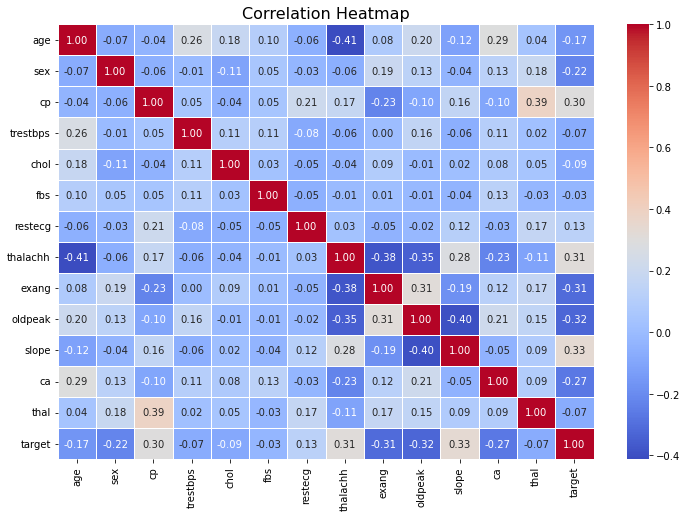

In [28]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Class (Target Label)


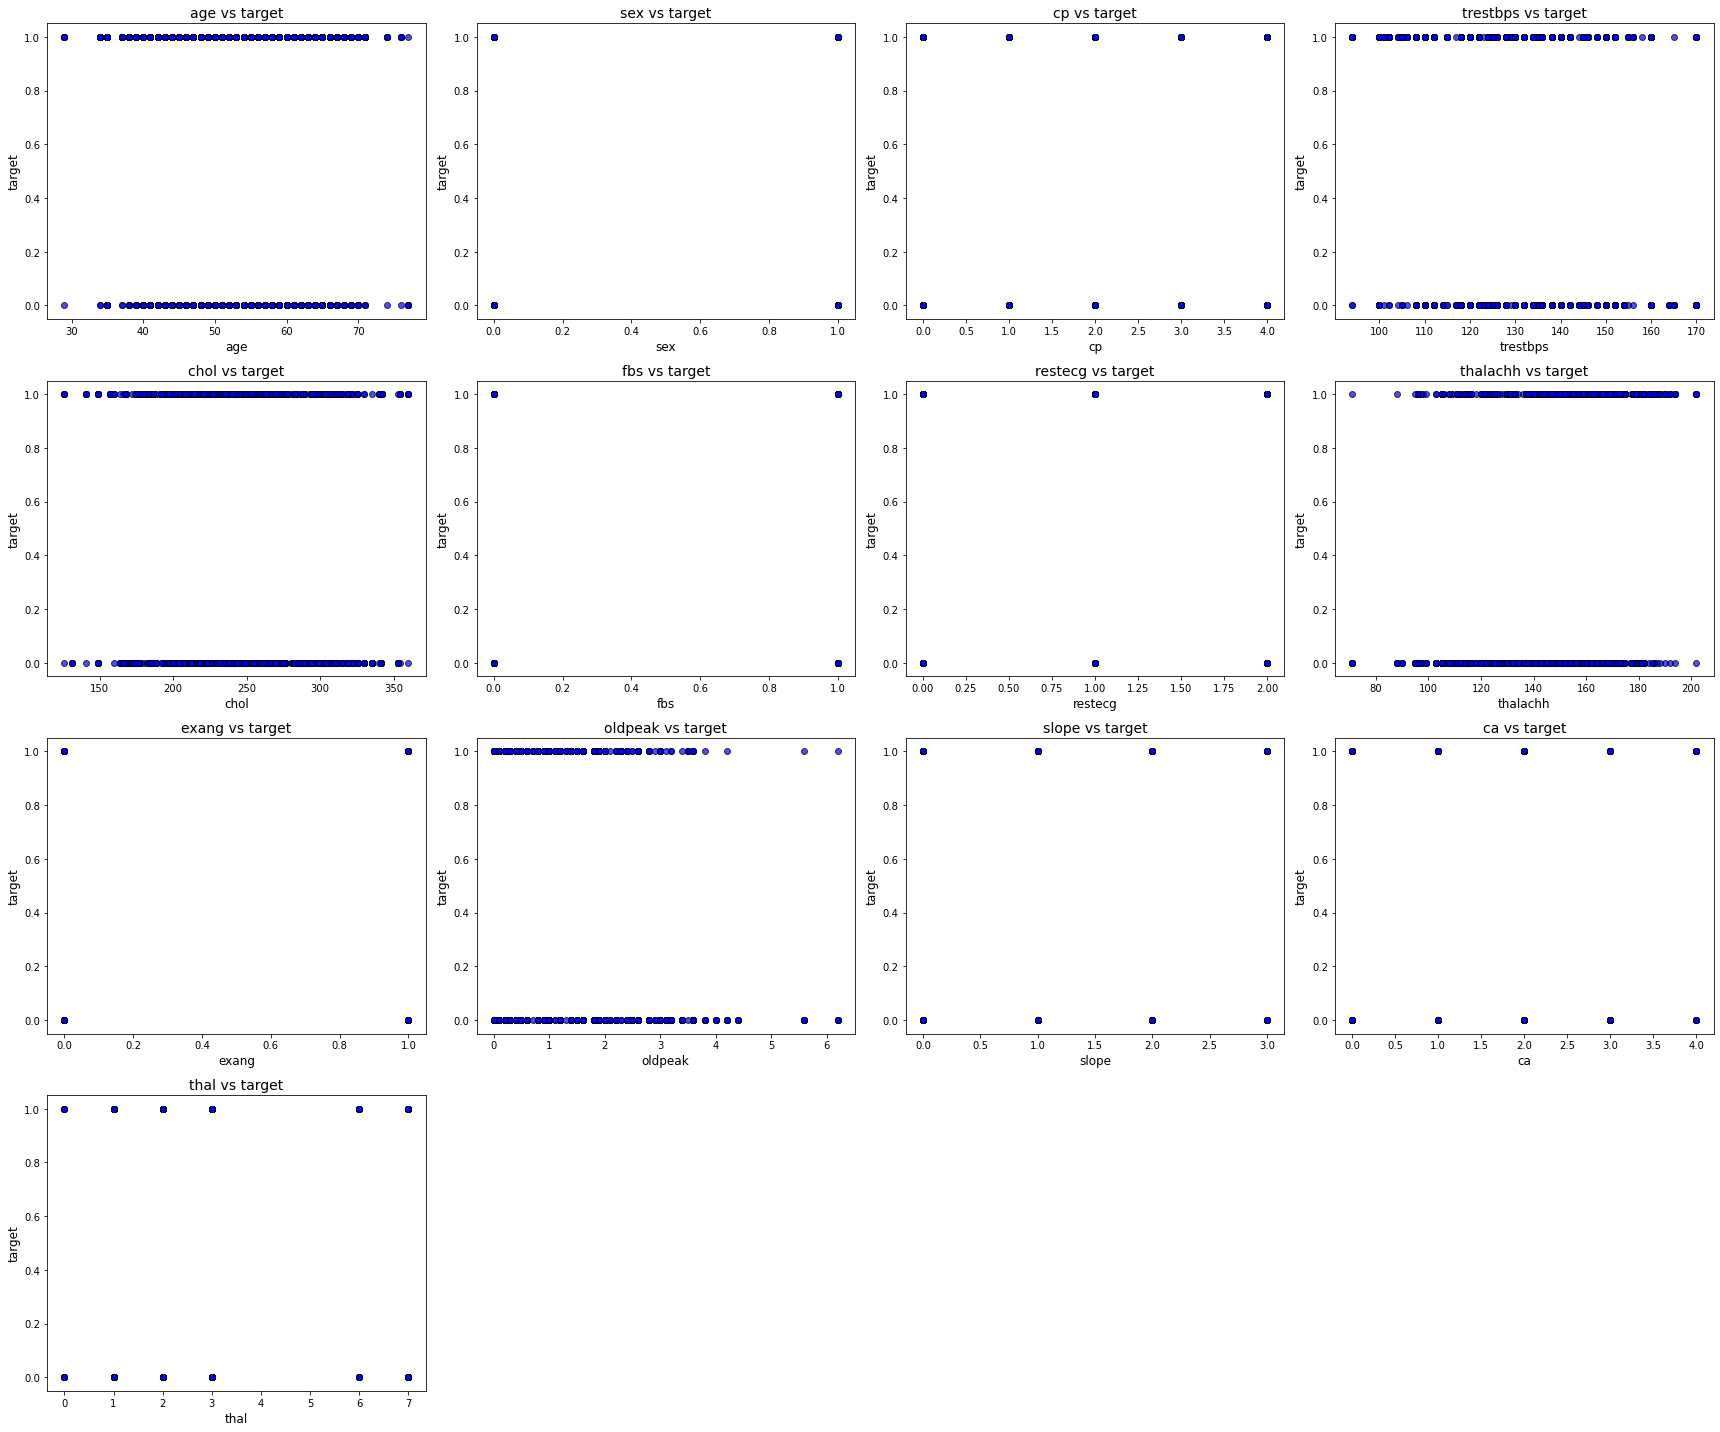

In [29]:
# Define features and target
features = df.columns[:13]
target = df.columns[13]

# Function to plot scatter plots for each feature against the target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    num_rows = (num_features // cols_per_row) + int(num_features % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))  # Adjust figure size for better readability
    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, cols_per_row, i)
        plt.scatter(df[feature], df[target], alpha=0.7, c='blue', edgecolor='k')
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.tight_layout()
    plt.show()

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)

# Feature Importance


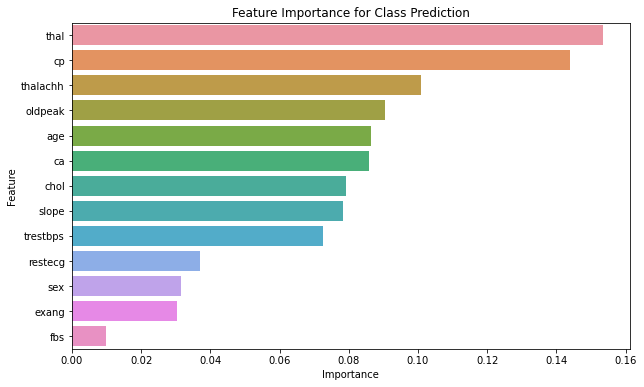

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df.drop(columns=['target'])
y = df['target']

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Class Prediction')
plt.show()

# Relationship Between Attributes


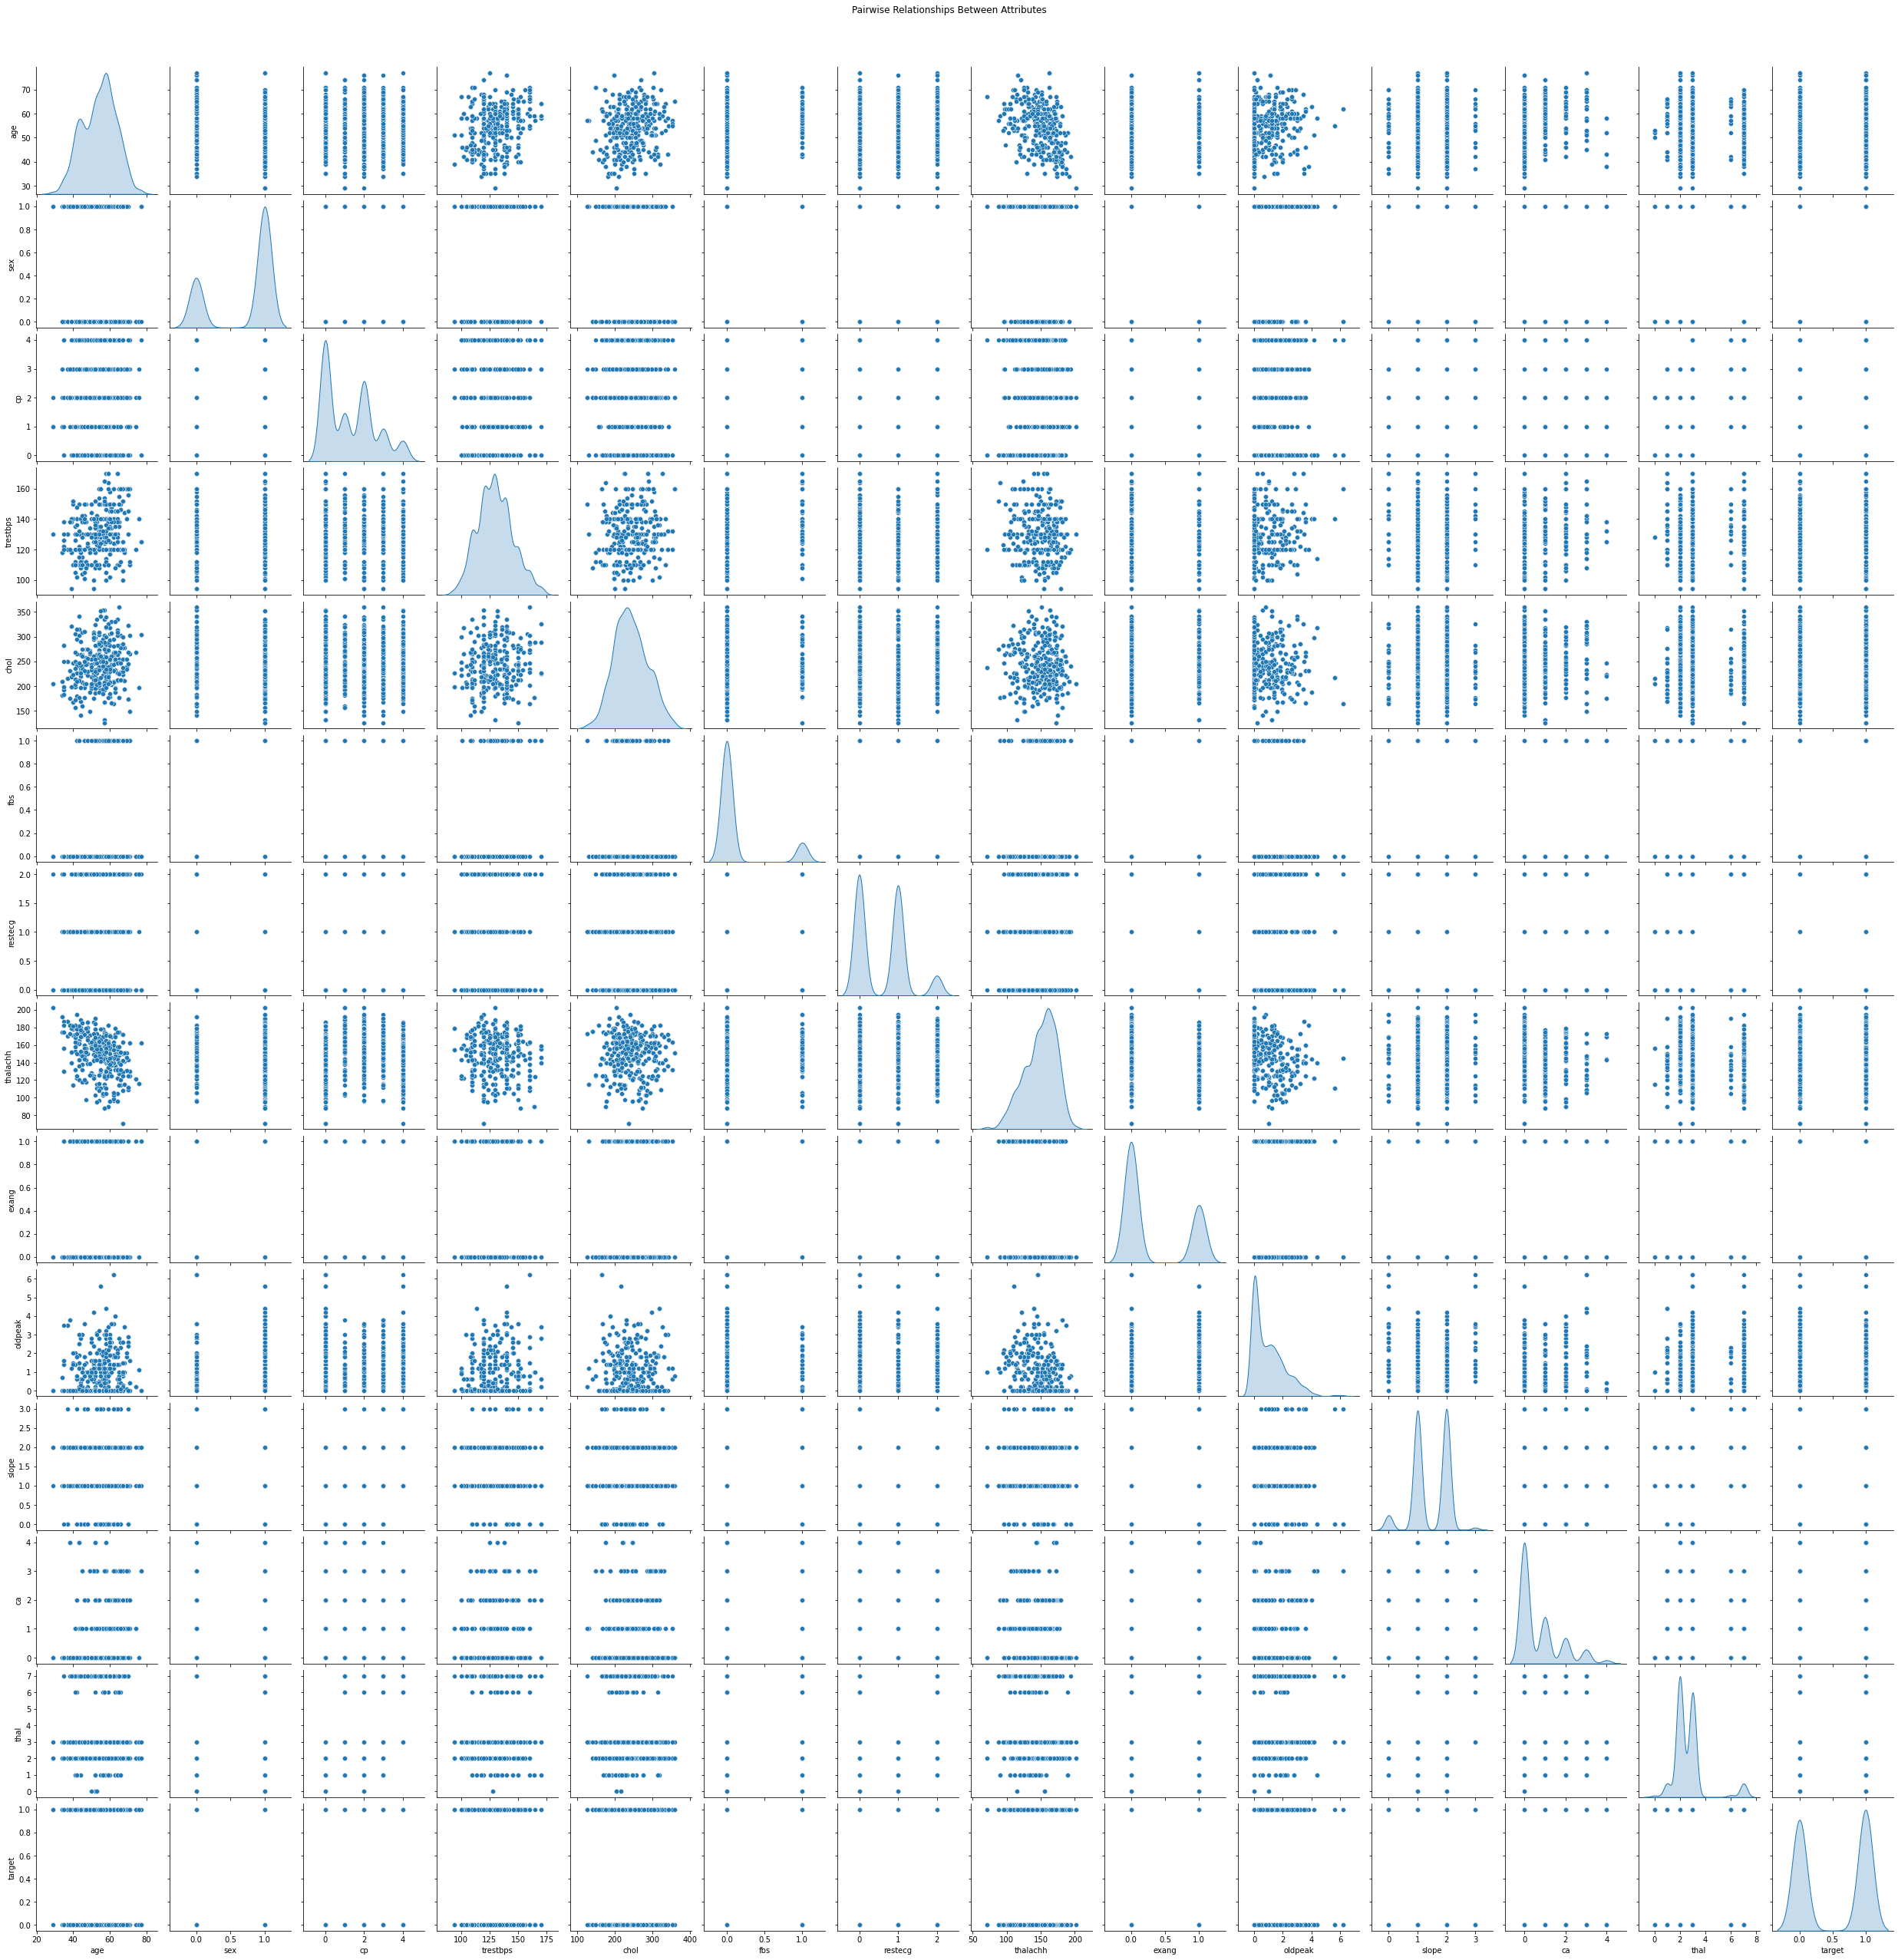

In [31]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

# Data Transformation


## Min-Max Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

array = df.values
# separate array into input and output components
X = array[:,0:13]
Y = array[:,13]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#print(X[0:5,:])
print(rescaledX[0:5,:])

[[0.70833333 1.         0.75       0.67105263 0.45726496 1.
  0.         0.60305344 0.         0.37096774 0.         0.
  0.14285714]
 [0.16666667 1.         0.5        0.47368421 0.52991453 0.
  0.5        0.88549618 0.         0.56451613 0.         0.
  0.28571429]
 [0.25       0.         0.25       0.47368421 0.33333333 0.
  0.         0.77099237 0.         0.22580645 0.66666667 0.
  0.28571429]
 [0.5625     1.         0.25       0.34210526 0.47008547 0.
  0.5        0.81679389 0.         0.12903226 0.66666667 0.
  0.28571429]
 [0.58333333 0.         0.         0.34210526 0.97435897 0.
  0.5        0.70229008 1.         0.09677419 0.66666667 0.
  0.28571429]]


In [33]:
#Verify total rows and columns are matched

# Print the dimensions of rescaledX
print("Total Rows in rescaledX:", rescaledX.shape[0])
print("Total Columns in rescaledX:", rescaledX.shape[1])

# Compare with the first 13 columns of df
df_subset = df.iloc[:, :13]  # Select the first 13 columns
print("Total Rows in df (first 13 columns):", df_subset.shape[0])
print("Total Columns in df (first 13 columns):", df_subset.shape[1])

# Check if the totals match
if rescaledX.shape == df_subset.shape:
    print("\nThe total rows and columns match!")
else:
    print("\nThe totals do not match.")
print()
rescaledX

Total Rows in rescaledX: 1800
Total Columns in rescaledX: 13
Total Rows in df (first 13 columns): 1800
Total Columns in df (first 13 columns): 13

The total rows and columns match!



array([[0.70833333, 1.        , 0.75      , ..., 0.        , 0.        ,
        0.14285714],
       [0.16666667, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.28571429],
       [0.25      , 0.        , 0.25      , ..., 0.66666667, 0.        ,
        0.28571429],
       ...,
       [0.625     , 1.        , 0.75      , ..., 0.66666667, 0.5       ,
        0.28571429],
       [0.52083333, 1.        , 0.25      , ..., 0.66666667, 0.25      ,
        0.28571429],
       [0.5       , 1.        , 0.        , ..., 0.33333333, 0.25      ,
        0.42857143]])

In [34]:
print(len(Y))
print()
Y

1800



array([1., 1., 1., ..., 0., 0., 0.])

#Splitting to Train and Test Data


## Use Min-Max Scaled Data for Training and Test


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

array = df.values

# Extract X (features) and y (target)
X = rescaledX
y = Y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Total Train and Test Data after Splitting


In [36]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 1260
Total test data of X: 540

Total training data of Y: 1260
Total test data of Y: 540


In [37]:
print(len(X_train))
print()
X_train

1260



array([[0.125     , 0.        , 1.        , ..., 0.33333333, 0.        ,
        0.42857143],
       [0.39583333, 1.        , 1.        , ..., 0.33333333, 0.        ,
        0.42857143],
       [0.4375    , 1.        , 0.5       , ..., 0.33333333, 0.25      ,
        0.42857143],
       ...,
       [0.45833333, 0.        , 0.5       , ..., 0.66666667, 0.25      ,
        0.28571429],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.42857143],
       [0.72916667, 0.        , 0.        , ..., 0.33333333, 0.5       ,
        0.28571429]])

In [38]:
print(len(X_test))
print()
X_test

540



array([[0.875     , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.28571429],
       [0.33333333, 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.28571429],
       [0.35416667, 1.        , 0.        , ..., 0.33333333, 0.5       ,
        0.42857143],
       ...,
       [0.27083333, 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.28571429],
       [0.39583333, 0.        , 0.5       , ..., 0.66666667, 0.        ,
        0.28571429],
       [0.70833333, 0.        , 0.25      , ..., 0.66666667, 0.5       ,
        0.28571429]])

# Checking for Data Imbalance


In [39]:
class_dist = df.groupby('target').size()
print(class_dist)
print()
print("Class 0 = Less Chance of Heart Attack")
print("Class 1 = High Chance of Heart Attack")
print()
total_samples = class_dist.sum()
percentages = (class_dist / total_samples) * 100
print(percentages)

# Calculate the percentage difference
percentage_diff = abs(percentages[0] - percentages[1]) / total_samples * 100
print()
# Check if the dataset is balanced or not
if percentage_diff < 20:
    print("The dataset is balanced with a percentage difference of {:.2f}%".format(percentage_diff))
else:
    print("The dataset is not balanced with a percentage difference of {:.2f}%".format(percentage_diff))

target
0    861
1    939
dtype: int64

Class 0 = Less Chance of Heart Attack
Class 1 = High Chance of Heart Attack

target
0    47.833333
1    52.166667
dtype: float64

The dataset is balanced with a percentage difference of 0.24%


# Train, Test and Evaluate Models


## Compare Machine Learning Algorithms



Linear Regression: Accuracy: 0.739

Classification Report for Linear Regression:
               precision    recall  f1-score   support

         0.0       0.77      0.65      0.70       258
         1.0       0.72      0.82      0.77       282

    accuracy                           0.74       540
   macro avg       0.74      0.73      0.74       540
weighted avg       0.74      0.74      0.74       540




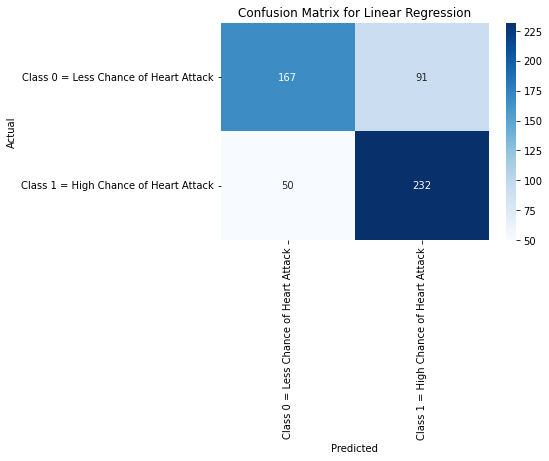



KNN: Accuracy: 0.889

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       258
         1.0       0.87      0.93      0.90       282

    accuracy                           0.89       540
   macro avg       0.89      0.89      0.89       540
weighted avg       0.89      0.89      0.89       540




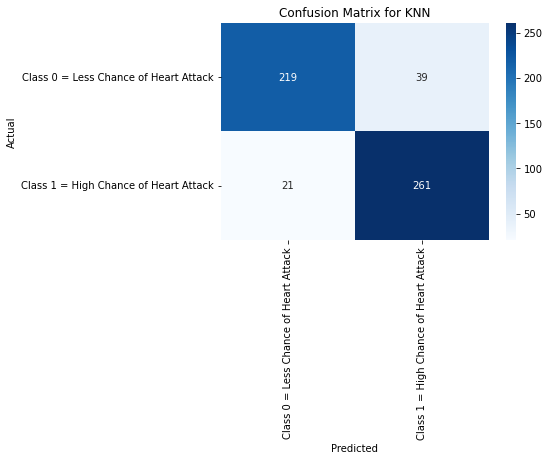



Decision Tree: Accuracy: 0.941

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       258
         1.0       0.94      0.95      0.94       282

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540




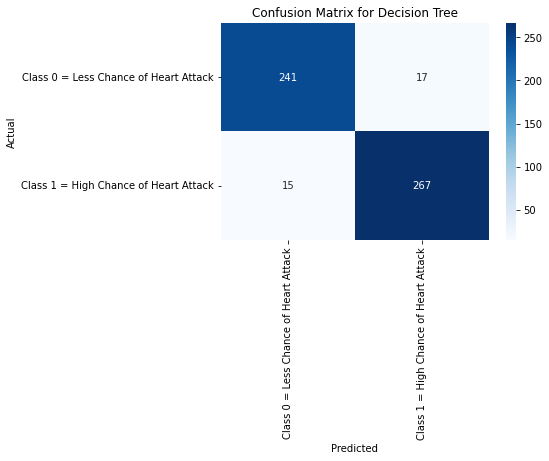



Naive Bayes: Accuracy: 0.709

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       258
         1.0       0.69      0.80      0.74       282

    accuracy                           0.71       540
   macro avg       0.71      0.70      0.70       540
weighted avg       0.71      0.71      0.71       540




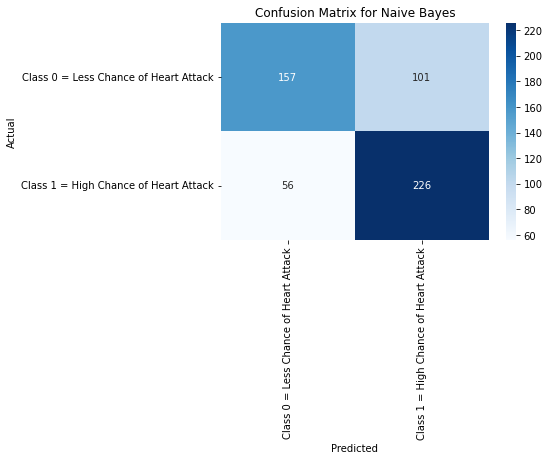



Support Vector Machine: Accuracy: 0.839

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       258
         1.0       0.82      0.89      0.85       282

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540




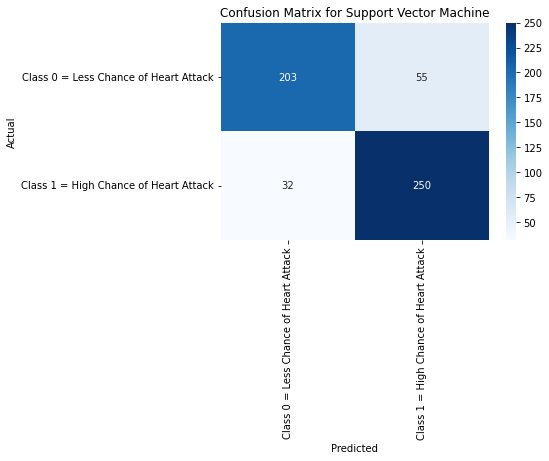



XGBoost: Accuracy: 0.954

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       258
         1.0       0.94      0.98      0.96       282

    accuracy                           0.95       540
   macro avg       0.96      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540




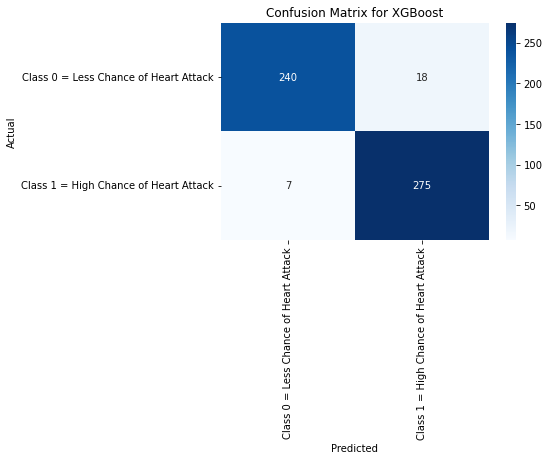



Algorithm Comparison:



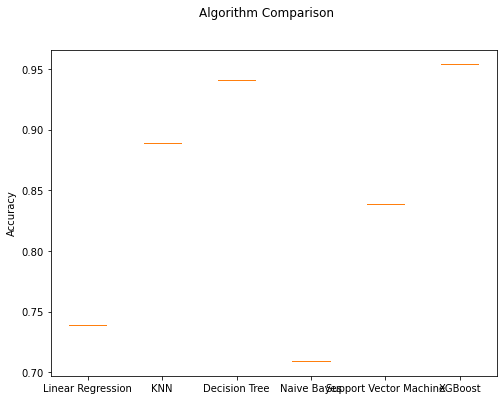

In [40]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Prepare models
models = []
models.append(('Linear Regression', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = model.score(X_test, y_test)
    results.append([accuracy])
    names.append(name)
    print()
    print(f"{name}: Accuracy: {accuracy:.3f}")
    print()

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0 = Less Chance of Heart Attack', 'Class 1 = High Chance of Heart Attack'], yticklabels=['Class 0 = Less Chance of Heart Attack', 'Class 1 = High Chance of Heart Attack'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()

# Boxplot for algorithm comparison
print()
print("Algorithm Comparison:")
print()
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.show()


In [46]:
# Dictionary to store predictions for each model
test_predictions = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    test_predictions[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual Value'] = y_test

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df

Table of Predictions:


,Linear Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,XGBoost,Actual Value
0,1.0,1.0,1.0,1.0,1.0,1,1.0
1,0.0,1.0,1.0,1.0,1.0,1,1.0
2,0.0,0.0,0.0,0.0,0.0,0,0.0
3,1.0,0.0,0.0,1.0,0.0,0,0.0
4,0.0,1.0,1.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...
535,0.0,0.0,0.0,0.0,0.0,0,0.0
536,1.0,0.0,1.0,1.0,0.0,0,1.0
537,1.0,1.0,1.0,1.0,1.0,1,1.0
538,1.0,1.0,1.0,1.0,1.0,1,1.0
